In [1]:
import pandas as pd
import numpy as np

C:\Users\Nidhi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,NaN,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1328.000000,1338.000000,1338.000000
mean,39.207025,30.670173,1.094918,13270.422265
std,14.049960,6.098275,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.272500,0.000000,4740.287150
50%,39.000000,30.380000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 1. Data Cleaning
We calculate the percentage of missing values in BMI column and impute them using the median.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1334 non-null   object 
 2   bmi       1328 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isna().sum()

age          0
sex          4
bmi         10
children     0
smoker       0
region       0
charges      0
dtype: int64

total 14 null values; 4 in sex column, & 10 in BMI column observed.

<Axes: >

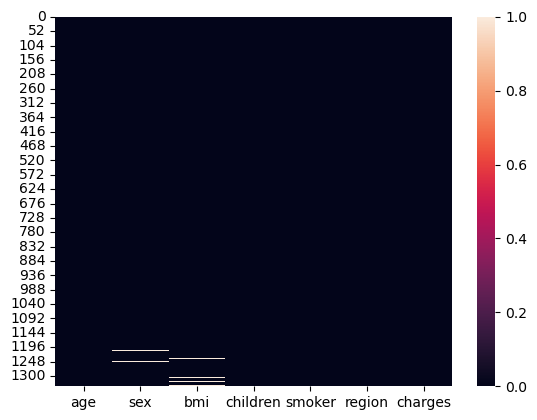

In [6]:
import seaborn as sns
sns.heatmap(data.isna()) #white lines= null

In [7]:
# % of null values
#i/total *100

In [8]:
len(data)

1338

In [9]:
for i in data.isna().sum():
    print((i/len(data))*100)

0.0
0.29895366218236175
0.7473841554559043
0.0
0.0
0.0
0.0


0.74% of BMI column is null. 

In [10]:
#median of bmi column
bmi_median = data['bmi'].median()
bmi_median

30.38

In [11]:
#replacing null with median
data['bmi'].fillna(bmi_median, inplace = True)

C:\Users\Nidhi\AppData\Local\Temp\ipykernel_5052\2150382104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(bmi_median, inplace = True)


In [12]:
data.isna().sum()

age         0
sex         4
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no null values in bmi column observed.

# 2. EDA - Correlation Matrix
We compute the Pearson correlation between charges and all other numeric variables (age, BMI, children). And then find out which variable has the strongest linear relationship with charges.

In [13]:
#pearson correlation of all numeric columns 
corr_mat = data.corr(method='pearson', numeric_only=True)
corr_mat

,age,bmi,children,charges
age,1.000000,0.109333,0.042469,0.299008
bmi,0.109333,1.000000,0.009610,0.197977
children,0.042469,0.009610,1.000000,0.067998
charges,0.299008,0.197977,0.067998,1.000000


<Axes: >

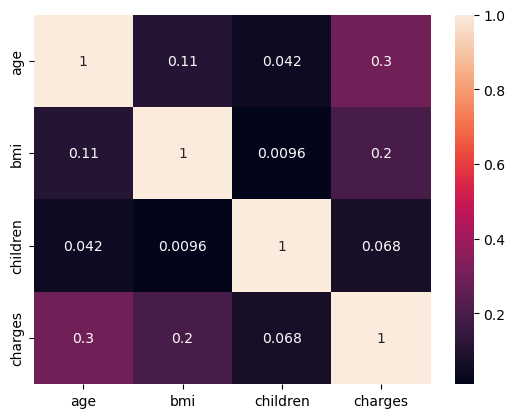

In [14]:
#heatmap of correlations of all numeric columns 
sns.heatmap(corr_mat, annot=True)

since the absolute value of relationship of age is closer to 1 compared to other numeric columns with charges, we can already see that age has the strongest linear relationship with charges (excluding charges with itself).

In [15]:
#correlation of charges with other numeric columns
charges_corr = corr_mat['charges'].drop('charges', errors='ignore')
print(f"\nCorrelations of charges:\n{charges_corr}\n")


Correlations of charges:
age         0.299008
bmi         0.197977
children    0.067998
Name: charges, dtype: float64



In [16]:
absolute_corr = charges_corr.abs()
print("Absolute Correlations of charges with other numeric vars:\n", absolute_corr)

Absolute Correlations of charges with other numeric vars:
 age         0.299008
bmi         0.197977
children    0.067998
Name: charges, dtype: float64


In [17]:
strongest_var = absolute_corr.idxmax() #the one with max index
strength_value = charges_corr[strongest_var]

print(f"\nThe variable with the strongest linear relationship with 'charges' is: '{strongest_var}'")
print(f"Its correlation coefficient is: {strength_value:}") 


The variable with the strongest linear relationship with 'charges' is: 'age'
Its correlation coefficient is: 0.299008193330648


# 3. Feature Engineering
After one-hot encoding the smoker and region columns, we find out how many total features are present in the dataset.

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
print("\nOriginal DataFrame columns:", data.columns.tolist())
print("Original number of features:", len(data.columns))


Original DataFrame columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Original number of features: 7


In [20]:
encode_cols = ['smoker', 'region']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
#ignore unseen categories in future and return numpy array

#fit 
OHE_data = encoder.fit_transform(data[encode_cols])

#feature names
OHE_features = encoder.get_feature_names_out(encode_cols)

In [21]:
OHE_data

array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.]])

In [22]:
print("new features:", OHE_features)
print("\n new number of features:", len(OHE_features))
print("\n new total number of features:", len(OHE_features)+len(data.columns)-2)#2 for smoking and region

new features: ['smoker_no' 'smoker_yes' 'region_northeast' 'region_northwest'
 'region_southeast' 'region_southwest']

 new number of features: 6

 new total number of features: 11


In [23]:
#new dataframe
encoded_df = pd.DataFrame(OHE_data, columns=OHE_features, index=data.index)

encoded_df

,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1333,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
#drop original columns
processed_df = data.drop(columns=encode_cols)

processed_df

,age,sex,bmi,children,charges
0,19,female,27.900,0,16884.92400
1,18,male,33.770,1,1725.55230
2,28,male,33.000,3,4449.46200
3,33,male,22.705,0,21984.47061
4,32,male,28.880,0,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,3,10600.54830
1334,18,female,31.920,0,2205.98080
1335,18,female,30.380,0,1629.83350
1336,21,female,25.800,0,2007.94500


In [25]:
#Concat processed df with new encoded df
OHE_df = pd.concat([processed_df, encoded_df], axis=1)

OHE_df

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,16884.92400,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,1725.55230,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,4449.46200,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,3866.85520,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,10600.54830,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,30.380,0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
print("\n Processed DataFrame head (after one-hot encoding):\n", OHE_df.head())
print("\n Final DataFrame columns:", OHE_df.columns.tolist())
print("\n Final number of features:", len(OHE_df.columns))


 Processed DataFrame head (after one-hot encoding):
    age     sex     bmi  children      charges  smoker_no  smoker_yes  \
0   19  female  27.900         0  16884.92400        0.0         1.0   
1   18    male  33.770         1   1725.55230        1.0         0.0   
2   28    male  33.000         3   4449.46200        1.0         0.0   
3   33    male  22.705         0  21984.47061        1.0         0.0   
4   32    male  28.880         0   3866.85520        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0               0.0               0.0               0.0               1.0  
1               0.0               0.0               1.0               0.0  
2               0.0               0.0               1.0               0.0  
3               0.0               1.0               0.0               0.0  
4               0.0               1.0               0.0               0.0  

 Final DataFrame columns: ['age', 'sex', 'bmi', 'childre

In [27]:
print("\n Original number of features:", len(data.columns))
print("\n Final number of features:", len(OHE_df.columns))


 Original number of features: 7

 Final number of features: 11


# 4. Model Evaluation
We apply a Linear Regression model and receive the following results:

•	MAE
•	MSE
•	RMSE

and interpret what RMSE means in this context.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

NOTE:

Directly used Encoded data with categorical columns already converted to float. 
Dropped sex column as it is in binary and has little to no impact on the charges column.

In [29]:
#split data
X = OHE_df.drop(['charges', 'sex'], axis=1) #all other variables
y = OHE_df['charges'] #target variable

print(X.shape, y.shape)

(1338, 9) (1338,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=45)
#45% data used for testing
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(735, 9) (735,) (603, 9) (603,)


In [31]:
#linear regression model
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.7216761305932

In [32]:
y_pred = lin_reg.predict(X_test)

#sample predictions
result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test, y_pred
result.sample(10)

,Actual,Predicted
34,51194.55914,31681.842839
1148,10791.96000,9720.153430
669,6500.23590,8242.952678
225,11987.16820,14204.219994
382,20781.48892,12941.741602
789,13457.96080,13882.264035
780,18259.21600,29188.253826
230,7443.64305,10975.059450
1306,16115.30450,30352.874675
911,33732.68670,27800.495081


In [33]:
#model evaluation
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [34]:
print(f"\n model evaluation (without sex column): ")
print(f"\n Mean Absolute Error (MAE): {mae:}")
print(f"\n Mean Squared Error (MSE): {mse:}")
print(f"\n Root Mean Squared Error (RMSE): {rmse:}")


 model evaluation (without sex column): 

 Mean Absolute Error (MAE): 4188.8200550358515

 Mean Squared Error (MSE): 36937508.00880054

 Root Mean Squared Error (RMSE): 6077.6235494476405


an RMSE of 6077.62 indicates that model's predictions for health insurance charges are, on average, off by roughly $6077.62.

# 5. Decision Tree Depth Impact
We apply a Decision Tree Regressor with max_depth = 3 and max_depth = 10. And observe which of the two is more likely to overfit and why.

In [35]:
from sklearn.tree import DecisionTreeRegressor

NOTE:

Directly used Encoded data with categorical columns already converted to float. 
Dropped sex column as it is in binary and has little to no impact on the charges column.

In [36]:
#split data
X = OHE_df.drop(['charges', 'sex'], axis=1) #all other variables
y = OHE_df['charges'] #target variable

print(X.shape, y.shape)

(1338, 9) (1338,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
#30% data for testing
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(936, 9) (936,) (402, 9) (402,)


In [38]:
#DTR model with max depth 3
model_md3 = DecisionTreeRegressor(max_depth=3, random_state=30)
model_md3.fit(X_train, y_train)
print("model training with maxdepth 3 complete!")

model training with maxdepth 3 complete!


In [39]:
#accuracy score
model_md3.score(X_test,y_test)

0.8310382212673093

In [40]:
#DTR model with max depth 10
model_md10 = DecisionTreeRegressor(max_depth=10, random_state=30)
model_md10.fit(X_train, y_train)
print("model training with maxdepth 10 complete!")

model training with maxdepth 10 complete!


In [41]:
#accuracy score
model_md10.score(X_test,y_test)

0.6958801542116986

Model with max depth 10 is more likely to overfit as it is a much denser tree with lower accuracy score in comparison to model with max depth 3. 

# visualizations

In [42]:
import matplotlib.pyplot as plt

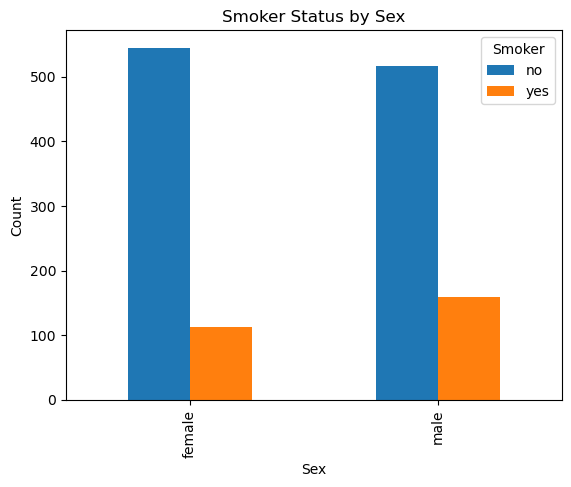

In [83]:
pd.crosstab(data['sex'],data['smoker'],).plot(kind='bar')
plt.title('Smoker Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

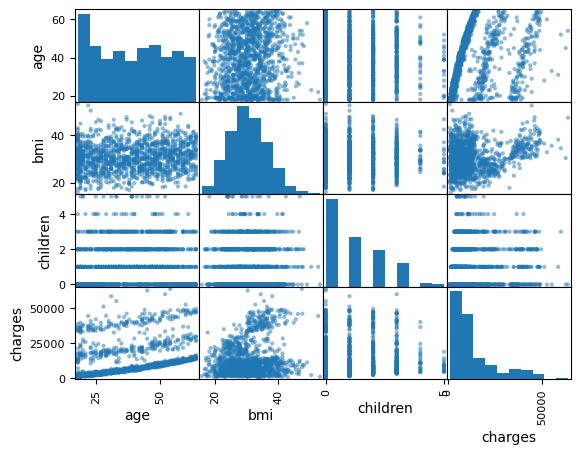

In [59]:
pd.plotting.scatter_matrix(data)
plt.show()

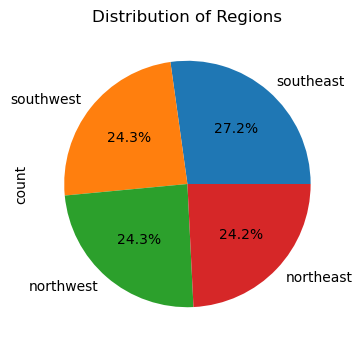

In [79]:
region_counts = data['region'].value_counts()
fig, ax = plt.subplots(figsize=(4, 4))
region_counts.plot(
    kind='pie', 
    autopct='%1.1f%%',  # Format for percentage labels    
    ax=ax)
ax.set_title('Distribution of Regions')
plt.show()